In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt
%matplotlib inline 

In [3]:
df = pd.read_csv('adult.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
country           32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df['country'] = df['country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)

df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
country           30162 non-null object
salary            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#convert dependent variable to binomial integer 
salary_map={' <=50K':1,' >50K':0}
df['salary']=df['salary'].map(salary_map).astype(int)



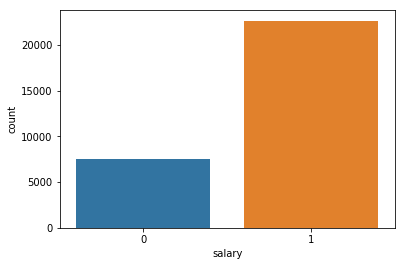

In [8]:
sns.countplot(x='salary', data = df) 

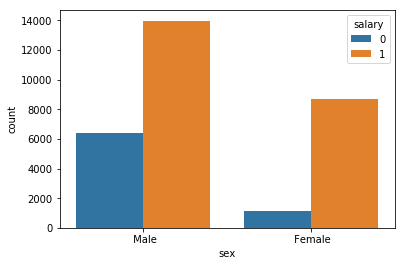

In [9]:
sns.countplot(df['sex'],hue=df['salary'])

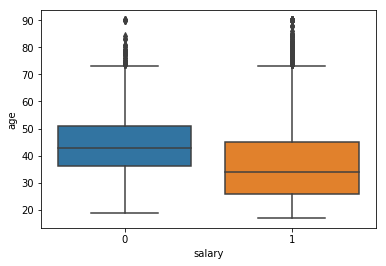

In [10]:
sns.boxplot(y='age',x='salary',data=df)

In [11]:
df = pd.get_dummies(df, drop_first=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 97 columns):
age                                      30162 non-null int64
fnlwgt                                   30162 non-null int64
education-num                            30162 non-null int64
capital-gain                             30162 non-null int64
capital-loss                             30162 non-null int64
hours-per-week                           30162 non-null int64
salary                                   30162 non-null int64
workclass_ Local-gov                     30162 non-null uint8
workclass_ Private                       30162 non-null uint8
workclass_ Self-emp-inc                  30162 non-null uint8
workclass_ Self-emp-not-inc              30162 non-null uint8
workclass_ State-gov                     30162 non-null uint8
workclass_ Without-pay                   30162 non-null uint8
education_ 11th                          30162 non-null uint8
education_ 12th        

In [13]:
X = df.drop(['salary'], axis=1)
y = df['salary']

split_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=0)


In [14]:
print(y.value_counts())

1    22654
0     7508
Name: salary, dtype: int64


In [15]:
print("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (21113, 96)(21113,)
Test dataset: (9049, 96)(9049,)


In [16]:
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#predictions
prediction = logmodel.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, prediction))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, prediction))

#what's happening here? 

----------------------------------------
Accuracy Score:
0.785390650900652
----------------------------------------
Confusion Matrix:
[[ 587 1698]
 [ 244 6520]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.71      0.26      0.38      2285
           1       0.79      0.96      0.87      6764

    accuracy                           0.79      9049
   macro avg       0.75      0.61      0.62      9049
weighted avg       0.77      0.79      0.75      9049



In [19]:
#smote
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts())

/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


1    15890
0    15890
dtype: int64


In [20]:
logmodel = LogisticRegression(C=100, solver='liblinear')
logmodel.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
prediction = logmodel.predict(X_test)

In [22]:
print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, prediction))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, prediction))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, prediction))

----------------------------------------
Accuracy Score:
0.7624046856006188
----------------------------------------
Confusion Matrix:
[[1865  420]
 [1730 5034]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.52      0.82      0.63      2285
           1       0.92      0.74      0.82      6764

    accuracy                           0.76      9049
   macro avg       0.72      0.78      0.73      9049
weighted avg       0.82      0.76      0.78      9049



**LogisticRegression has several optional parameters that define the behavior of the model and approach:**

**penalty**- is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.

**dual**- is a Boolean (False by default) that decides whether to use primal (when False) or dual formulation (when True).

**tol**- is a floating-point number (0.0001 by default) that defines the tolerance for stopping the procedure.

**C**- is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.

**fit_intercept**- is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (when True) or consider it equal to zero (when False).

**intercept_scaling**- is a floating-point number (1.0 by default) that defines the scaling of the intercept 𝑏₀.

**class_weight**- is a dictionary, 'balanced', or None (default) that defines the weights related to each class. When None, all classes have the weight one.

**random_state**- is an integer, an instance of numpy.RandomState, or None (default) that defines what pseudo-random number generator to use.

**solver**- is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.

**max_iter**- is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.

**multi_class**- is a string ('ovr' by default) that decides the approach to use for handling multiple classes. Other options are 'multinomial' and 'auto'.

**verbose**- is a non-negative integer (0 by default) that defines the verbosity for the 'liblinear' and 'lbfgs' solvers.

**warm_start**- is a Boolean (False by default) that decides whether to reuse the previously obtained solution.

**n_jobs**- is an integer or None (default) that defines the number of parallel processes to use. None usually means to use one core, while -1 means to use all available cores.

**l1_ratio**- is either a floating-point number between zero and one or None (default). It defines the relative importance of the L1 part in the elastic-net regularization.

**You should carefully match the solver and regularization method for several reasons:**

'liblinear' solver doesn’t work without regularization.
'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.
'saga' is the only solver that supports elastic-net regularization.

In [23]:
C = [100, 10, 1, .1, .001]
for c in C:
    logmodel = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    logmodel.fit(X_train_resampled, y_train_resampled)
    print('C:', c)
    print('Training accuracy:', logmodel.score(X_train_resampled, y_train_resampled))
    print('Test accuracy:', logmodel.score(X_test, y_test))
    print('')

C: 100
Training accuracy: 0.8386721208307112
Test accuracy: 0.8082661067521273

C: 10
Training accuracy: 0.8382630585273757
Test accuracy: 0.8081555973035695

C: 1
Training accuracy: 0.837570799244808
Test accuracy: 0.808487125649243

C: 0.1
Training accuracy: 0.8352737570799245
Test accuracy: 0.8056138799867388

C: 0.001
Training accuracy: 0.7669288860918817
Test accuracy: 0.7183114156260361



### Comparing Logistic Regression with Other Models

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- Not many parameters to tune
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Can't automatically learn feature interactions